This notebook examines the changes of the expenditure of the City of Boston from 2012 to 2023 (Fiscal Years)

By Wanchen Hong

## 1. Load the Data

In [15]:
import pandas as pd

file_paths = [
    'data/checkbook-explorer-fy12.csv',
    'data/checkbook-explorer-fy13.csv',
    'data/checkbook-explorer-fy14.csv',
    'data/checkbook-explorer-fy15.csv',
    'data/checkbook-explorer-fy16.csv',
    'data/checkbook-explorer-fy17.csv',
    'data/checkbook-explorer-fy18.csv',
    'data/checkbook-explorer-fy19.csv',
    'data/checkbook-explorer-fy20.csv',
    'data/checkbook-explorer-fy21.csv',
    'data/checkbook-explorer-fy22.csv',
    'data/checkbook-explorer-fy23.csv'
]

df_12 = pd.read_csv(file_paths[0])
df_13 = pd.read_csv(file_paths[1])
df_14 = pd.read_csv(file_paths[2])
df_15 = pd.read_csv(file_paths[3])
df_16 = pd.read_csv(file_paths[4])
df_17 = pd.read_csv(file_paths[5])
df_18 = pd.read_csv(file_paths[6])
df_19 = pd.read_csv(file_paths[7])
df_20 = pd.read_csv(file_paths[8])
df_21 = pd.read_csv(file_paths[9],encoding='ISO-8859-1')
df_22 = pd.read_csv(file_paths[10],encoding='ISO-8859-1')
df_23 = pd.read_csv(file_paths[11],encoding='ISO-8859-1')

C:\Users\Wanchen Hong\AppData\Local\Temp\ipykernel_16380\4201298459.py:18: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_12 = pd.read_csv(file_paths[0])
C:\Users\Wanchen Hong\AppData\Local\Temp\ipykernel_16380\4201298459.py:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_13 = pd.read_csv(file_paths[1])
C:\Users\Wanchen Hong\AppData\Local\Temp\ipykernel_16380\4201298459.py:20: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_14 = pd.read_csv(file_paths[2])
C:\Users\Wanchen Hong\AppData\Local\Temp\ipykernel_16380\4201298459.py:21: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_15 = pd.read_csv(file_paths[3])
C:\Users\Wanchen Hong\AppData\Local\Temp\ipykernel_16380\4201298459.py:22: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or

## 2. Data Cleaning and Feature Extraction

In [16]:
df_12.head()

,voucher,voucher_line,distribution_line,entered,month_number,fiscal_month,month,fiscal_year,year,vendor_name,account,account_descr,dept,dept_name,c6_digit_org_name,monetary_amount
0,10112669,1,1,2/21/2012,2,8,Febraury,2012,2012,Office Max,53909,MiscSup Other,101068,Boston Public School Dept,Chief Operating Officer,488.02
1,10112692,1,1,3/2/2012,3,9,March,2012,2012,Positive Promotions,52907,Cont Serv Other,101097,Boston Public School Dept,Food & Nutrition Svc,1450.31
2,11312001,1,1,11/17/2011,11,5,November,2012,2011,"P.J. Systems,Inc. DBA",53905,MiscSup Major Computer Syst,113100,Office of New Bostonians,New Bostonians,908.00
3,13112001,1,1,7/29/2011,7,1,July,2012,2011,"Shepard,Barbara",52907,Cont Serv Other,101630,Boston Public School Dept,Charlestown High School,1818.40
4,13112002,1,1,7/29/2011,7,1,July,2012,2011,The Commonwealth of Massachusetts,54901,Current Dues/Membership,19096B,Boston Community Centers,Community Child Care Voucher,75.00


In [17]:
df_23.head()

,Voucher,Voucher_Line,Distribution_Line,Entered,Month_Number,Fiscal_Month,Month,Fiscal_Year,Year,Vendor_Name,Account,Account_Descr,Dept,Dept_Name,c6_Digit_Org_Name,Monetary_Amount
0,3180957,1,1,7/13/2022,7,1,July,2022,2022,Clean Harbors Environmental Services Inc,52504,WasteRmvl Other Services,311801,Public Works Department,PWD Waste Reduction,13252.00
1,3181060,1,1,7/13/2022,7,1,July,2022,2022,"Rochester Bituminous Products, Inc.",52922,ContServ Construction Capital,311000,Public Works Department,Public Works Department,529786.67
2,3178461,1,1,7/6/2022,7,1,July,2022,2022,Mount Auburn Hospital,52919,ContServ Medical,211307,Police Department,HUMAN RESOURCES DIVISION,1350.00
3,3178546,1,1,7/6/2022,7,1,July,2022,2022,Occupational Resource Network,56103,WkrsComp Voc/Voc Rehab,341101,Workers Compensation Fund,Workers Comp - PI Charges,577.00
4,3179794,1,1,7/8/2022,7,1,July,2022,2022,Occupational Resource Network,56103,WkrsComp Voc/Voc Rehab,341101,Workers Compensation Fund,Workers Comp - PI Charges,100.00


In [20]:
print(df_12.isna().sum().sum())
print(df_13.isna().sum().sum())
print(df_14.isna().sum().sum())
print(df_15.isna().sum().sum())
print(df_16.isna().sum().sum())
print(df_17.isna().sum().sum())
print(df_18.isna().sum().sum())
print(df_19.isna().sum().sum())
print(df_20.isna().sum().sum())
print(df_21.isna().sum().sum())
print(df_22.isna().sum().sum())
print(df_23.isna().sum().sum())

0
0
0
0
0
0
0
0
0
495
0
0


In [21]:
df_21.isna().sum()

Voucher                0
Voucher_Line           0
Distribution_Line      0
Entered                0
Month_Number         165
Fiscal_Month         165
Month                165
Fiscal_Year            0
Year                   0
Vendor_Name            0
Account                0
Account_Descr          0
Dept                   0
Dept_Name              0
c6_Digit_Org_Name      0
Monetary_Amount        0
dtype: int64

In [28]:
df_21[df_21.isna().any(axis=1)]

,Voucher,Voucher_Line,Distribution_Line,Entered,Month_Number,Fiscal_Month,Month,Fiscal_Year,Year,Vendor_Name,Account,Account_Descr,Dept,Dept_Name,c6_Digit_Org_Name,Monetary_Amount
10937,2956393,3,1,9/30/2020,NaN,NaN,NaN,2021,2021,G.A. Blanco & Sons Inc.,53802,EducSup Instructional Other,101318,Boston Public School Dept,Kennedy JF Elementary,110.00
10938,2956393,2,1,9/30/2020,NaN,NaN,NaN,2021,2021,G.A. Blanco & Sons Inc.,53802,EducSup Instructional Other,101318,Boston Public School Dept,Kennedy JF Elementary,240.00
10939,2956393,1,1,9/30/2020,NaN,NaN,NaN,2021,2021,G.A. Blanco & Sons Inc.,53802,EducSup Instructional Other,101318,Boston Public School Dept,Kennedy JF Elementary,240.00
10940,2956394,1,1,9/30/2020,NaN,NaN,NaN,2021,2021,Crispus Attucks Childrens Center,52940,Subreceipt Contract Services,101013,Boston Public School Dept,Early Learning Services,13587.30
10941,2956395,1,1,9/30/2020,NaN,NaN,NaN,2021,2021,"Imagine Learning, Inc.",52907,Cont Serv Other,101018,Boston Public School Dept,Teaching & Learning,57398.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11097,2956900,1,1,9/30/2020,NaN,NaN,NaN,2021,2021,Benjamin Franklin Institute of Tech.,59101,Award/Gift Trust Fund,138910,Treas Dept - Treasury Division,Treasurer - Non-Expendable,45000.00
11098,2957020,1,1,9/30/2020,NaN,NaN,NaN,2021,2021,TRANSDEV SERVICES. INC,52810,TransTrvl Athletics,101081,Boston Public School Dept,BPS Transportation,25585.71
11099,2957021,1,1,9/30/2020,NaN,NaN,NaN,2021,2021,"TMobile USA, Inc.",52111,Telecom Other,149100,Dpt of Innovation & Technology,Operations,6594.00
11100,2957022,1,1,9/30/2020,NaN,NaN,NaN,2021,2021,"TMobile USA, Inc.",52111,Telecom Other,149100,Dpt of Innovation & Technology,Operations,6867.00


For all other datasets, the Month is the same as the enter month, so assume this is the same for the missing data, I would use the fiscal month 3 (actual month 9) for the missing data.

In [29]:
df_21.loc[df_21.isna().any(axis=1), 'Fiscal_Month'] = 3.0

In [30]:
df_21.iloc[10940]

Voucher                                       2956394
Voucher_Line                                        1
Distribution_Line                                   1
Entered                                     9/30/2020
Month_Number                                      NaN
Fiscal_Month                                      3.0
Month                                             NaN
Fiscal_Year                                      2021
Year                                             2021
Vendor_Name          Crispus Attucks Childrens Center
Account                                         52940
Account_Descr           Subreceipt Contract  Services
Dept                                           101013
Dept_Name                   Boston Public School Dept
c6_Digit_Org_Name             Early Learning Services
Monetary_Amount                               13587.3
Name: 10940, dtype: object

In [41]:
df_20.columns

Index(['voucher', 'voucher_line', 'distribution_line', 'entered',
       'month_number', 'fiscal_month', 'month', 'fiscal_year', 'year',
       'vendor_name', 'account', 'account_descr', 'dept', 'dept_name',
       'c6_digit_org_name', 'monetary_amount'],
      dtype='object')

Make sure the column names are consistent

In [44]:
df_21.columns = df_20.columns
df_22.columns = df_20.columns
df_23.columns = df_20.columns

In [45]:
df_23.columns

Index(['voucher', 'voucher_line', 'distribution_line', 'entered',
       'month_number', 'fiscal_month', 'month', 'fiscal_year', 'year',
       'vendor_name', 'account', 'account_descr', 'dept', 'dept_name',
       'c6_digit_org_name', 'monetary_amount'],
      dtype='object')

Extract the Fiscal Year, Month, Department and Monetary Amount columns since they are the interest

In [49]:
columns_to_keep = ['fiscal_year', 'fiscal_month', 'dept_name', 'monetary_amount']

all_budget_df = pd.concat([df_12[columns_to_keep],df_13[columns_to_keep],df_14[columns_to_keep],df_15[columns_to_keep],df_16[columns_to_keep],df_17[columns_to_keep],
                           df_18[columns_to_keep],df_19[columns_to_keep],df_20[columns_to_keep],df_21[columns_to_keep],df_22[columns_to_keep],df_23[columns_to_keep]], ignore_index=True)

In [50]:
all_budget_df.head()

,fiscal_year,fiscal_month,dept_name,monetary_amount
0,2012,8.0,Boston Public School Dept,488.02
1,2012,9.0,Boston Public School Dept,1450.31
2,2012,5.0,Office of New Bostonians,908.00
3,2012,1.0,Boston Public School Dept,1818.40
4,2012,1.0,Boston Community Centers,75.00


In [52]:
all_budget_df = all_budget_df.sort_values(by=['fiscal_year', 'fiscal_month'])
all_budget_df.head()

,fiscal_year,fiscal_month,dept_name,monetary_amount
3,2012,1.0,Boston Public School Dept,1818.40
4,2012,1.0,Boston Community Centers,75.00
17,2012,1.0,Collecting Division,100000.00
34,2012,1.0,Dpt of Innovation & Technology,15.21
35,2012,1.0,Fire Department,102.91


In [58]:
all_budget_df.to_csv('data/all_budget.csv', index=False)

## 3. Time Series Analysis

In [70]:
import pandas as pd

all_budget_df = pd.read_csv('data/all_budget.csv')

In [71]:
all_budget_df.head()

,fiscal_year,fiscal_month,dept_name,monetary_amount
0,2012,1.0,Boston Public School Dept,1818.40
1,2012,1.0,Boston Community Centers,75.00
2,2012,1.0,Collecting Division,100000.00
3,2012,1.0,Dpt of Innovation & Technology,15.21
4,2012,1.0,Fire Department,102.91


In [72]:
all_budget_df['fiscal_time'] = all_budget_df['fiscal_year'].astype(str) + '-' + all_budget_df['fiscal_month'].astype(int).astype(str)

In [73]:
all_budget_df.head()

,fiscal_year,fiscal_month,dept_name,monetary_amount,fiscal_time
0,2012,1.0,Boston Public School Dept,1818.40,2012-1
1,2012,1.0,Boston Community Centers,75.00,2012-1
2,2012,1.0,Collecting Division,100000.00,2012-1
3,2012,1.0,Dpt of Innovation & Technology,15.21,2012-1
4,2012,1.0,Fire Department,102.91,2012-1


### The total Expenses over Time

In [77]:
total_expenses_by_month = all_budget_df.groupby(['fiscal_time'])['monetary_amount'].sum().reset_index()

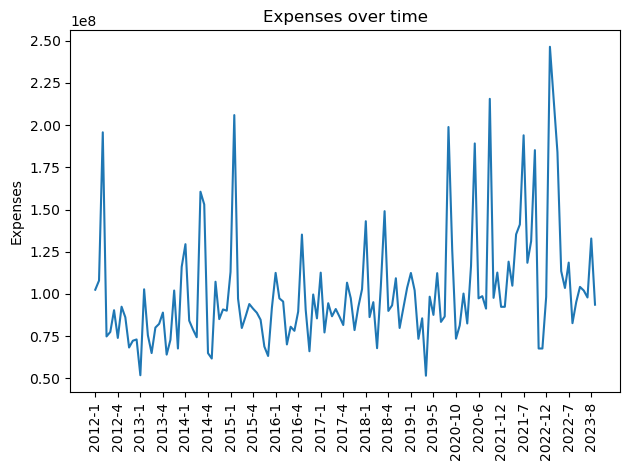

In [87]:
import matplotlib.pyplot as plt

plt.plot(total_expenses_by_month['monetary_amount'])
plt.xticks(ticks=range(0, len(total_expenses_by_month['fiscal_time']), 6),
           labels=total_expenses_by_month['fiscal_time'][::6], rotation=90)
plt.ylabel('Expenses')
plt.title('Expenses over time')
plt.tight_layout()
plt.show()

Generally, the expenses over time by month has a vague increasing trend, which is not very obvious

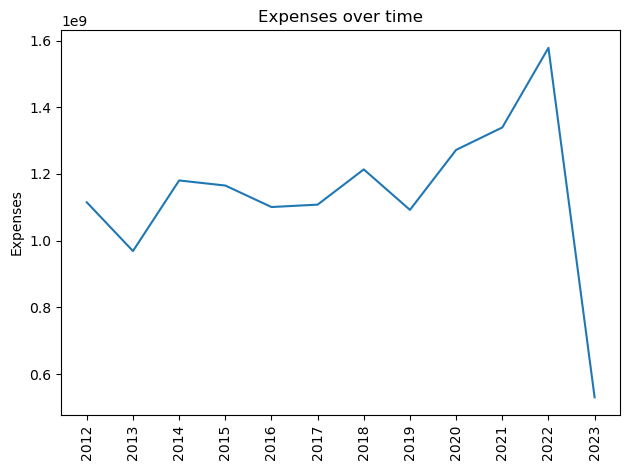

In [89]:
total_expenses_by_year = all_budget_df.groupby(['fiscal_year'])['monetary_amount'].sum().reset_index()
import matplotlib.pyplot as plt

plt.plot(total_expenses_by_year['monetary_amount'])
plt.xticks(ticks=range(0, len(total_expenses_by_year['fiscal_year']), 1),
           labels=total_expenses_by_year['fiscal_year'][::1], rotation=90)
plt.ylabel('Expenses')
plt.title('Expenses over time')
plt.tight_layout()
plt.show()

For the yearly trend, we can see that the expenses is about the same from 2012 to 2019, but has been increasing from 2020 to 2022. The 2023 data is very low possibly because the data is not complete.

### The total Expenses by Department

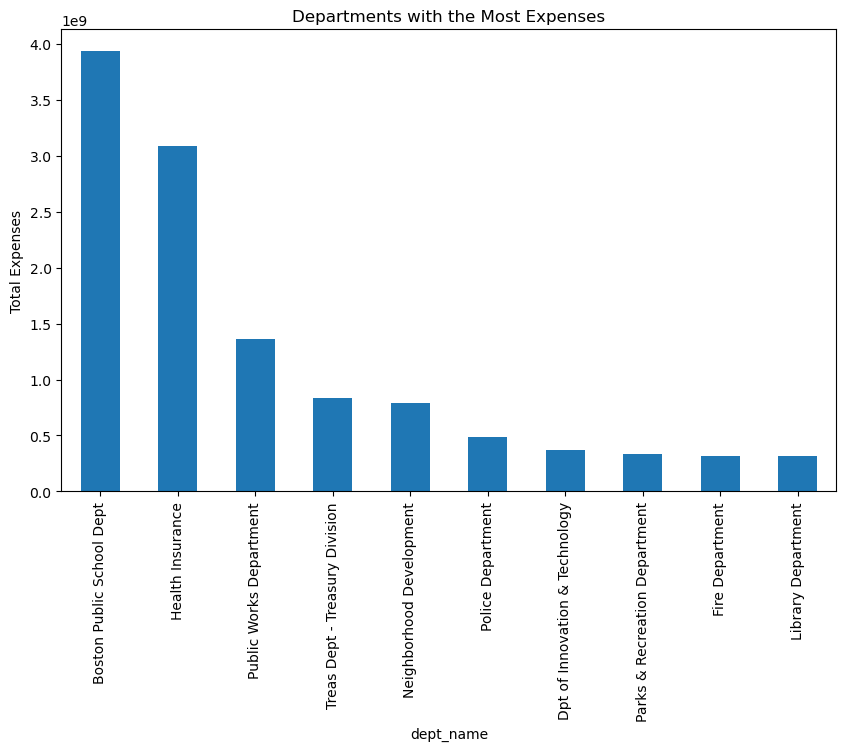

In [99]:
dept_expenses = all_budget_df.groupby('dept_name')['monetary_amount'].sum().nlargest(10)
dept_expenses = dept_expenses.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
dept_expenses.plot(kind='bar')
plt.ylabel('Total Expenses')
plt.title('Departments with the Most Expenses')
plt.show()

Overall, the most spent categories over the past decade is still Boston Public Schools, followed by Health Insurance, and Public works.

### Department Expenses over Time

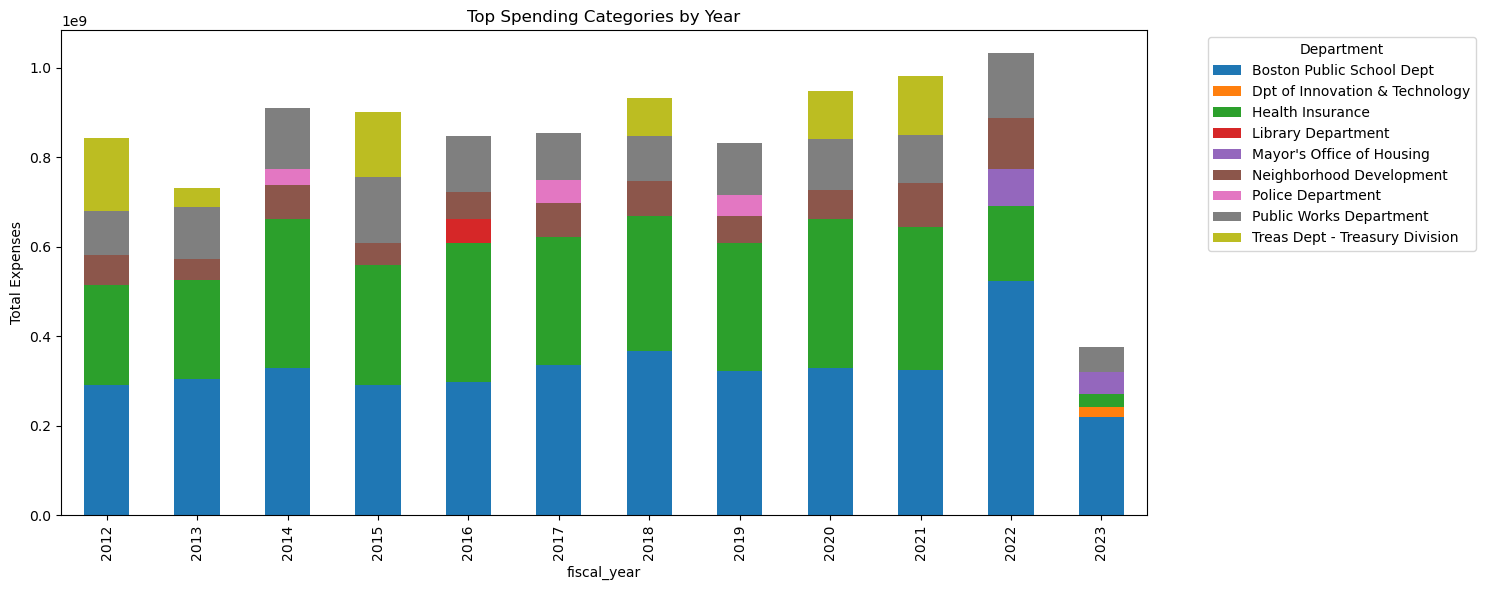

In [122]:
dept_expenses_by_year = all_budget_df.groupby(['fiscal_year', 'dept_name'])['monetary_amount'].sum().reset_index()

top_categories_by_year = dept_expenses_by_year.groupby('fiscal_year').apply(
    lambda x: x.nlargest(5, 'monetary_amount')).reset_index(drop=True)

top_categories_by_year = top_categories_by_year.pivot(index='fiscal_year', columns='dept_name', values='monetary_amount')

fig, ax = plt.subplots(figsize=(15, 6))
top_categories_by_year.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Total Expenses')
ax.set_title('Top Spending Categories by Year')
ax.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

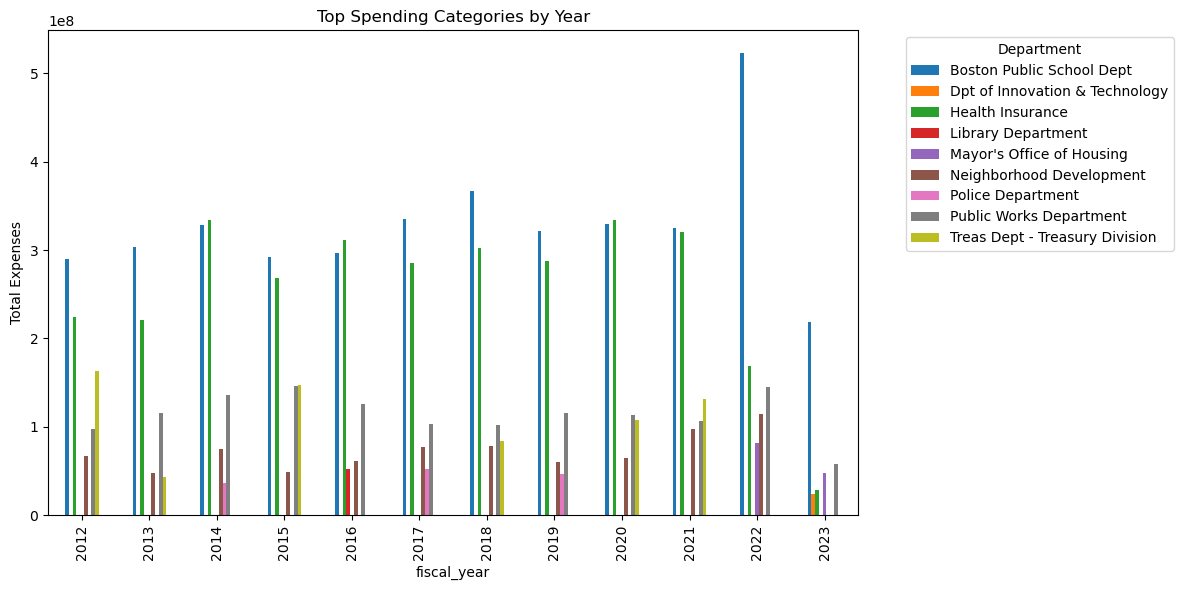

In [121]:
fig, ax = plt.subplots(figsize=(12, 6))
top_categories_by_year.plot(kind='bar', ax=ax)

ax.set_ylabel('Total Expenses')
ax.set_title('Top Spending Categories by Year')

ax.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()